In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

%pylab inline

Populating the interactive namespace from numpy and matplotlib


We first loaded the dataset acquired from kaggle.

In [2]:
data = pd.read_csv(r"C:\Users\Clarisa Hilario\Downloads\Family-Income-and-Expenditure.csv")
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


We first viewed the contents of the dataset and see what else is needed for our analysis

In [3]:
data.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [4]:
data.describe(include=np.object)

<ipython-input-4-289c2ff97710>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=np.object)


,Region,Main Source of Income,Household Head Sex,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply
count,41544,41544,41544,41544,41544,41544,34008,34008,41544,41544,41544,41544,41544,41544,41544
unique,17,3,2,6,46,2,378,7,3,6,7,6,8,8,11
top,IVA - CALABARZON,Wage/Salaries,Male,Married,High School Graduate,With Job/Business,Farmhands and laborers,Self-employed wihout any employee,Single Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system"
freq,4162,20388,32483,31347,9628,34008,3478,13766,28445,39069,33342,27739,29541,29162,16093


In [5]:
data.shape

(41544, 60)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

We listed all expenditures that were of unique category and added all of these to get the total expenditures for each household

In [7]:
exp=['Total Food Expenditure', 
     'Restaurant and hotels Expenditure', 
     'Alcoholic Beverages Expenditure', 
     'Tobacco Expenditure', 
     'Clothing, Footwear and Other Wear Expenditure',
     'Housing and water Expenditure', 'Medical Care Expenditure', 
     'Transportation Expenditure', 
     'Communication Expenditure', 
     'Education Expenditure', 
     'Miscellaneous Goods and Services Expenditure', 
     'Special Occasions Expenditure',  
     'Crop Farming and Gardening expenses']
data['total_expenditures']=0
for i in exp:
    data['total_expenditures']=data['total_expenditures']+data[i]

In [8]:
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,total_expenditures
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,0,0,0,2,1,0,0,1,297030
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,1,0,0,0,3,1,0,0,2,184888
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,96213
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,1,0,0,0,0,130679
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,0,3,0,0,0,1,175402


We then substracted the total expenditures to the total household income to get the net income of each household

In [9]:
data['net_hincome']= data['Total Household Income']-data['total_expenditures']

In [10]:
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,total_expenditures,net_hincome
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,0,0,0,2,1,0,0,1,297030,183302
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,0,0,3,1,0,0,2,184888,13347
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,96213,-13428
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,1,0,0,0,0,130679,-23090
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,3,0,0,0,1,175402,13920


### Exploratory Data Analysis

We started with making a bar chart of the average net income for each region.

In [11]:
ave_net= data.groupby('Region', as_index=False)['net_hincome'].mean()
ave_net= ave_net.rename(columns={"net_hincome": "ave_net"}, errors="raise")
ave_net.head(17)

,Region,ave_net
0,ARMM,-14382.657028
1,CAR,46821.480580
2,Caraga,33936.673962
3,I - Ilocos Region,43081.206133
4,II - Cagayan Valley,35754.511041
5,III - Central Luzon,46570.968798
6,IVA - CALABARZON,38584.837578
7,IVB - MIMAROPA,43275.790232
8,IX - Zasmboanga Peninsula,38274.476510
9,NCR,67447.718886


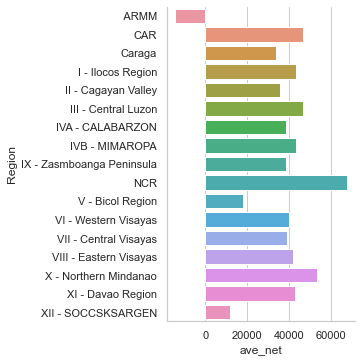

In [13]:
sns.set_theme(style="whitegrid")
net_plot = sns.catplot(y = "Region", x="ave_net", orient="h", kind="bar", data=ave_net)

We did the same concept but now, with the total household income

In [12]:
ave_income= data.groupby('Region', as_index=False)['Total Household Income'].mean()
ave_income= ave_income.rename(columns={"Total Household Income": "ave_income"}, errors="raise")
ave_income.head(17)

,Region,ave_income
0,ARMM,134746.817616
1,CAR,269540.484638
2,Caraga,196907.376543
3,I - Ilocos Region,238110.084327
4,II - Cagayan Valley,236778.221721
5,III - Central Luzon,292965.181650
6,IVA - CALABARZON,303360.536040
7,IVB - MIMAROPA,216685.124900
8,IX - Zasmboanga Peninsula,191000.908277
9,NCR,420861.861501


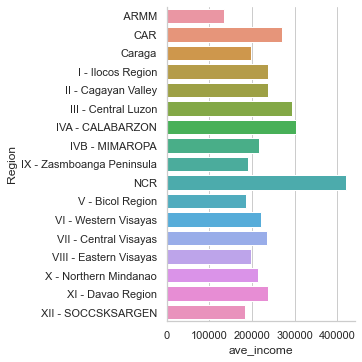

In [16]:
sns.set_theme(style="whitegrid")
income_plot = sns.catplot(y = "Region", x="ave_income", orient="h", kind="bar", data=ave_income)

We started to explore the different factors that we needed that would impact income as well as the expenditures. We simulated how each factor would be coded in the web app.

In [17]:
car = data.loc[data['Region'] == "CAR"]
source= car['Main Source of Income']
print(source)

0                  Wage/Salaries
1                  Wage/Salaries
2                  Wage/Salaries
3                  Wage/Salaries
4                  Wage/Salaries
                  ...           
40778              Wage/Salaries
40779              Wage/Salaries
40780    Other sources of Income
40781              Wage/Salaries
40782              Wage/Salaries
Name: Main Source of Income, Length: 1725, dtype: object


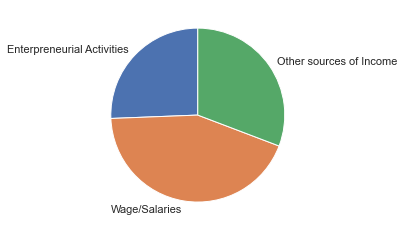

In [22]:
carunique_source = list(set(source))
carsources_list = []
for x in carunique_source:
    carsources_list.append((source == x).sum())
plt.pie(carsources_list, labels = carunique_source, startangle = 90)
plt.show() 

In [23]:
car_occ = car['Household Head Occupation']
carunique_occ = list(set(car_occ))
carocc_list = []
for x in carunique_occ:
    carocc_list.append((car_occ == x).sum())
np.mean(carocc_list)
carocc_count = car['Household Head Occupation'].value_counts().rename_axis('occ').reset_index(name='counts')
carocc_count = carocc_count.nlargest(100, 'counts')
carocc_count

,occ,counts
0,Rice farmers,376
1,Vegetable farmers,86
2,Farmhands and laborers,81
3,General managers/managing proprietors in whole...,71
4,Corn farmers,64
...,...,...
95,Government tax and excise officials,1
96,Sugarcane farmers,1
97,Garbage collectors,1
98,Appraisers and valuers,1


for the household head occupation. We decided to only include in the graph the occupations whose count are greater than or equal to the average count per each occupation. The table below is the resulting values to be graphed.

In [28]:
carocc_count['counts'].mean()
carocc_count=carocc_count.drop(carocc_count[carocc_count.counts < 10].index)
carocc_count

,occ,counts
0,Rice farmers,376
1,Vegetable farmers,86
2,Farmhands and laborers,81
3,General managers/managing proprietors in whole...,71
4,Corn farmers,64
5,Carpenters and joiners,54
6,Building construction laborers,52
7,"Car, taxi and van drivers",39
8,Root crops farmers,36
9,General managers/managing proprietors in trans...,34


C:\Users\Clarisa Hilario\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


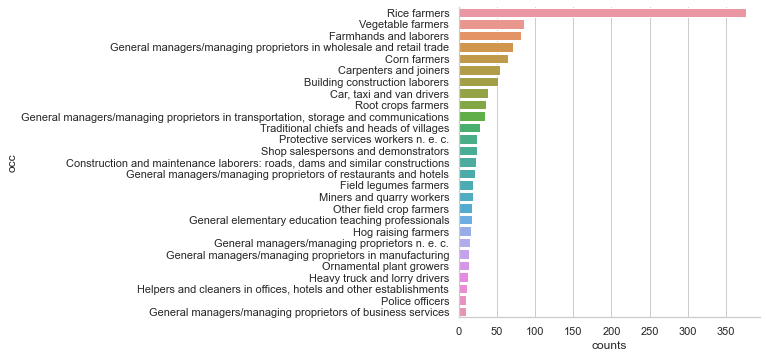

In [29]:
sns.set_theme(style="whitegrid")
carocc_plot = sns.catplot(y = "occ", x="counts", orient="h", kind="bar", data=carocc_count)